In [ ]:
#Import libraries
from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np

## **Scrapping Data**

source: https://www.airlinequality.com/airline-reviews/emirates/

In [ ]:
#Web Page Url
URL = "https://www.airlinequality.com/airline-reviews/emirates/"
pages = 11
page_size = 1000

reviews = []

for i in range(1, pages):
    print(f"Scrapping page {i}")
    
    # Create URL to collect links from paginated data
    url = f"{URL}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from the chosen page
    response = requests.get(url)
    
    # Parse the content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scrapping page 1
   ---> 1000 total reviews
Scrapping page 2
   ---> 2000 total reviews
Scrapping page 3
   ---> 2262 total reviews
Scrapping page 4
   ---> 2262 total reviews
Scrapping page 5
   ---> 2262 total reviews
Scrapping page 6
   ---> 2262 total reviews
Scrapping page 7
   ---> 2262 total reviews
Scrapping page 8
   ---> 2262 total reviews
Scrapping page 9
   ---> 2262 total reviews
Scrapping page 10
   ---> 2262 total reviews


In [ ]:
#Save scrapping result into pandas DataFrame
df = pd.DataFrame()
df['reviews'] = reviews
df.head()
#df.to_csv('emirates_airline_reviews.csv', header=True, index=False)

,reviews
0,✅ Trip Verified | I have travelled a lot with...
1,✅ Trip Verified | Fantastic service from host...
2,✅ Trip Verified | This must be the worst food...
3,Not Verified | I strongly recommend flying wi...
4,"Not Verified | Unfortunately, my experience on..."


## **Understanding the Pattern**

After scrapping the data, analys them to gain insights

In [ ]:
df

,reviews
0,✅ Trip Verified | I have travelled a lot with...
1,✅ Trip Verified | Fantastic service from host...
2,✅ Trip Verified | This must be the worst food...
3,Not Verified | I strongly recommend flying wi...
4,"Not Verified | Unfortunately, my experience on..."
...,...
2257,Cape Town to Bangkok-departed on time excellen...
2258,Flew 6 flights recently in business with Emira...
2259,The fleets are new comfy. Flew Narita-Dubai-Mu...
2260,NBO-SIN-NBO. First leg was alright but nothing...


There are three types od pattern should we cleaned

**First condition with `✅ Trip Verified` words in every begining reviews**

For example, 

`✅ Trip Verified | I remember that we were very satisfied with this airline until a few years ago. But now it has been 3 times that we are very dissatisfied with the quality of food and the number of times served on a long flight! Why should we feel hungry on such a long flight and when we asked for food, they only give a small packet of crackers and we have to wait for several hours until it is time to serve their disgusting food? It was not like that before, that's why we surprised!`

**Second condition with `Not Verified` words in every begining reviews**

For example,

`Not Verified | I was pleasantly surprised by level of service and experience on this flight. Everything went smooth, food was very tasty, great choices of dishes and beverages. Overall, staff was very helpful always trying to accommodate the customer needs`

**Third condition with directly going to review**

`Flew from Durban to London Gatwick via Dubai. The first leg of the flight was awful - seat backrest was broken staff could not fix it so they moved us to two different seats which were even worse with a solid lump at the base of the backrests that made it impossible to get comfortable in any position on this long flight. The second leg was great in a two-week old aircraft where we could finally sit in comfort. Unfortunately the Durban-Dubai experience has put me off Emirates.`

## **DATA CLEANSING**

In this part, I'm gonna drop unimportant data and focus on important part of data. The goal is to prepare well-clean data frame and ready to visualize

In [ ]:
def process_reviews(reviews):
    if reviews.startswith('✅ Trip Verified'):
        return reviews.split('|', 1)[1]
    elif reviews.startswith('Not Verified'):
        return reviews.split('|', 1)[1]
    else:
        return reviews

In [ ]:
#Applied process_reviews() function pada kolom reviews DataFrama
df['reviews'] = df['reviews'].apply(process_reviews)

In [ ]:
df

,reviews
0,I have travelled a lot with Emirates but thi...
1,Fantastic service from hostess Malek from Tu...
2,This must be the worst food I have ever tast...
3,I strongly recommend flying with a different...
4,"Unfortunately, my experience on Emirates airl..."
...,...
2257,Cape Town to Bangkok-departed on time excellen...
2258,Flew 6 flights recently in business with Emira...
2259,The fleets are new comfy. Flew Narita-Dubai-Mu...
2260,NBO-SIN-NBO. First leg was alright but nothing...


In [ ]:
#Import re (Regular Expression)
import re
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

#Cleaned reviews columns
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df

,reviews,Cleaned Reviews
0,I have travelled a lot with Emirates but thi...,I have travelled a lot with Emirates but this...
1,Fantastic service from hostess Malek from Tu...,Fantastic service from hostess Malek from Tun...
2,This must be the worst food I have ever tast...,This must be the worst food I have ever taste...
3,I strongly recommend flying with a different...,I strongly recommend flying with a different ...
4,"Unfortunately, my experience on Emirates airl...",Unfortunately my experience on Emirates airli...
...,...,...
2257,Cape Town to Bangkok-departed on time excellen...,Cape Town to Bangkok departed on time excellen...
2258,Flew 6 flights recently in business with Emira...,Flew flights recently in business with Emirate...
2259,The fleets are new comfy. Flew Narita-Dubai-Mu...,The fleets are new comfy Flew Narita Dubai Mun...
2260,NBO-SIN-NBO. First leg was alright but nothing...,NBO SIN NBO First leg was alright but nothing ...


In [ ]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)

df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,I have travelled a lot with Emirates but thi...,I have travelled a lot with Emirates but this...,"[(travelled, v), (lot, n), (Emirates, n), (tim..."
1,Fantastic service from hostess Malek from Tu...,Fantastic service from hostess Malek from Tun...,"[(Fantastic, a), (service, n), (hostess, a), (..."
2,This must be the worst food I have ever tast...,This must be the worst food I have ever taste...,"[(must, None), (worst, a), (food, n), (ever, r..."
3,I strongly recommend flying with a different...,I strongly recommend flying with a different ...,"[(strongly, r), (recommend, v), (flying, v), (..."
4,"Unfortunately, my experience on Emirates airl...",Unfortunately my experience on Emirates airli...,"[(Unfortunately, r), (experience, n), (Emirate..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,I have travelled a lot with Emirates but thi...,I have travelled a lot with Emirates but this...,"[(travelled, v), (lot, n), (Emirates, n), (tim...",travel lot Emirates time kind crew Gabriel I...
1,Fantastic service from hostess Malek from Tu...,Fantastic service from hostess Malek from Tun...,"[(Fantastic, a), (service, n), (hostess, a), (...",Fantastic service hostess Malek Tunisia Frie...
2,This must be the worst food I have ever tast...,This must be the worst food I have ever taste...,"[(must, None), (worst, a), (food, n), (ever, r...",must bad food ever taste airline trip Apart ...
3,I strongly recommend flying with a different...,I strongly recommend flying with a different ...,"[(strongly, r), (recommend, v), (flying, v), (...",strongly recommend fly different airline inf...
4,"Unfortunately, my experience on Emirates airl...",Unfortunately my experience on Emirates airli...,"[(Unfortunately, r), (experience, n), (Emirate...",Unfortunately experience Emirates airline ec...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,I have travelled a lot with Emirates but thi...,travel lot Emirates time kind crew Gabriel I...
1,Fantastic service from hostess Malek from Tu...,Fantastic service hostess Malek Tunisia Frie...
2,This must be the worst food I have ever tast...,must bad food ever taste airline trip Apart ...
3,I strongly recommend flying with a different...,strongly recommend fly different airline inf...
4,"Unfortunately, my experience on Emirates airl...",Unfortunately experience Emirates airline ec...
...,...,...
2257,Cape Town to Bangkok-departed on time excellen...,Cape Town Bangkok depart time excellent IFE ...
2258,Flew 6 flights recently in business with Emira...,Flew flight recently business Emirates fligh...
2259,The fleets are new comfy. Flew Narita-Dubai-Mu...,fleet new comfy Flew Narita Dubai Munich Rom...
2260,NBO-SIN-NBO. First leg was alright but nothing...,NBO SIN NBO First leg alright nothing great ...


## **Sentiment Analysis**

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,I have travelled a lot with Emirates but thi...,I have travelled a lot with Emirates but this...,"[(travelled, v), (lot, n), (Emirates, n), (tim...",travel lot Emirates time kind crew Gabriel I...,0.9393,Positive
1,Fantastic service from hostess Malek from Tu...,Fantastic service from hostess Malek from Tun...,"[(Fantastic, a), (service, n), (hostess, a), (...",Fantastic service hostess Malek Tunisia Frie...,0.9803,Positive
2,This must be the worst food I have ever tast...,This must be the worst food I have ever taste...,"[(must, None), (worst, a), (food, n), (ever, r...",must bad food ever taste airline trip Apart ...,-0.7939,Negative
3,I strongly recommend flying with a different...,I strongly recommend flying with a different ...,"[(strongly, r), (recommend, v), (flying, v), (...",strongly recommend fly different airline inf...,0.8555,Positive
4,"Unfortunately, my experience on Emirates airl...",Unfortunately my experience on Emirates airli...,"[(Unfortunately, r), (experience, n), (Emirate...",Unfortunately experience Emirates airline ec...,-0.8860,Negative


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    1417
Negative     628
Neutral      217
Name: Analysis, dtype: int64

In [ ]:
# I created the following data frame as a benchmark as ready-clean data 
clean_df = pd.DataFrame(df['Lemma'].tolist(), columns=['reviews'])
clean_df

,reviews
0,travel lot Emirates time kind crew Gabriel I...
1,Fantastic service hostess Malek Tunisia Frie...
2,must bad food ever taste airline trip Apart ...
3,strongly recommend fly different airline inf...
4,Unfortunately experience Emirates airline ec...
...,...
2257,Cape Town Bangkok depart time excellent IFE ...
2258,Flew flight recently business Emirates fligh...
2259,fleet new comfy Flew Narita Dubai Munich Rom...
2260,NBO SIN NBO First leg alright nothing great ...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# initiate object to CountVectorizer
vectorizer = CountVectorizer()

# transform data to vector
X = vectorizer.fit_transform(clean_df['reviews'])

# get feature names
feature_names = vectorizer.get_feature_names_out()

# count occurrences of each word
word_counts = X.sum(axis=0).A1

# create a dictionary mapping words to their respective counts
word_counts_dict = dict(zip(feature_names, word_counts))

# sort the dictionary in descending order of word counts
sorted_word_counts = sorted(word_counts_dict.items(), key=lambda x: x[1], reverse=True)

# print the sorted word counts
#for word, count in sorted_word_counts:
    #print(f"{word}: {count}")

# counting how many times each word appears, then sorting in descending order
#word_counts = dict(zip(vectorizer.get_feature_names(), X.sum(axis=0).tolist()[0]))
#sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# print the top ten words that appear the most in the review for checking
print(sorted_word_counts[:10])

[('flight', 4726), ('emirates', 3350), ('dubai', 2925), ('seat', 2239), ('service', 2159), ('time', 1682), ('good', 1585), ('food', 1520), ('crew', 1376), ('hour', 1320)]


In [ ]:
#Save them on pandas data frame
df_word_counts = pd.DataFrame(sorted_word_counts, columns=['Word', 'Frequency'])
df_word_counts

,Word,Frequency
0,flight,4726
1,emirates,3350
2,dubai,2925
3,seat,2239
4,service,2159
...,...,...
8248,zh,1
8249,zimbabwe,1
8250,zonal,1
8251,zoo,1


In [ ]:
import re
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing text
clean_df['clean_reviews'] = clean_df['reviews'].apply(lambda x: re.sub(r'[^\w\s]','',x.lower()))

# Tokenization
clean_df['tokens'] = clean_df['clean_reviews'].apply(lambda x: x.split())

# Bigram
clean_df['bigrams'] = clean_df['tokens'].apply(lambda x: [x[i] + " " + x[i+1] for i in range(len(x)-1)])

# Counting bigram frequency
bigram_freq = Counter([item for sublist in clean_df['bigrams'] for item in sublist])

# Creating DataFrame for top 15 bigrams
bigrams_df = pd.DataFrame(bigram_freq.most_common(), columns=['Bigram', 'Frequency'])
bigrams_df

,Bigram,Frequency
0,via dubai,706
1,business class,682
2,cabin crew,557
3,fly emirates,412
4,verified review,379
...,...,...
105599,nice hand,1
105600,hand out,1
105601,out airline,1
105602,however think,1


In [ ]:
import pandas as pd
from nltk import ngrams
from collections import Counter

# create trigrams
trigrams_list = []
for review in clean_df['reviews']:
    review_trigrams = ngrams(review.split(), 3)
    trigrams_list.extend(review_trigrams)

# count trigrams and create dataframe
trigrams_counts = Counter(trigrams_list)
trigrams_df = pd.DataFrame.from_dict(trigrams_counts, orient='index', columns=['Frequency'])
trigrams_df.index = trigrams_df.index.map(' '.join)
trigrams_df.index.name = 'Trigram'
trigrams_df = trigrams_df.reset_index()

# sort by frequency
trigrams_df = trigrams_df.sort_values('Frequency', ascending=False)

# reset index
trigrams_df = trigrams_df.reset_index(drop=True)
trigrams_df

,Trigram,Frequency
0,via Dubai Emirates,104
1,time fly Emirates,49
2,Bangkok via Dubai,46
3,London via Dubai,41
4,business class seat,41
...,...,...
164506,row front seat,1
164507,front seat travel,1
164508,seat travel much,1
164509,travel much day,1


## **Visualization**

Using data that has been created, `vader_counts` I try to create visualization using seaborn

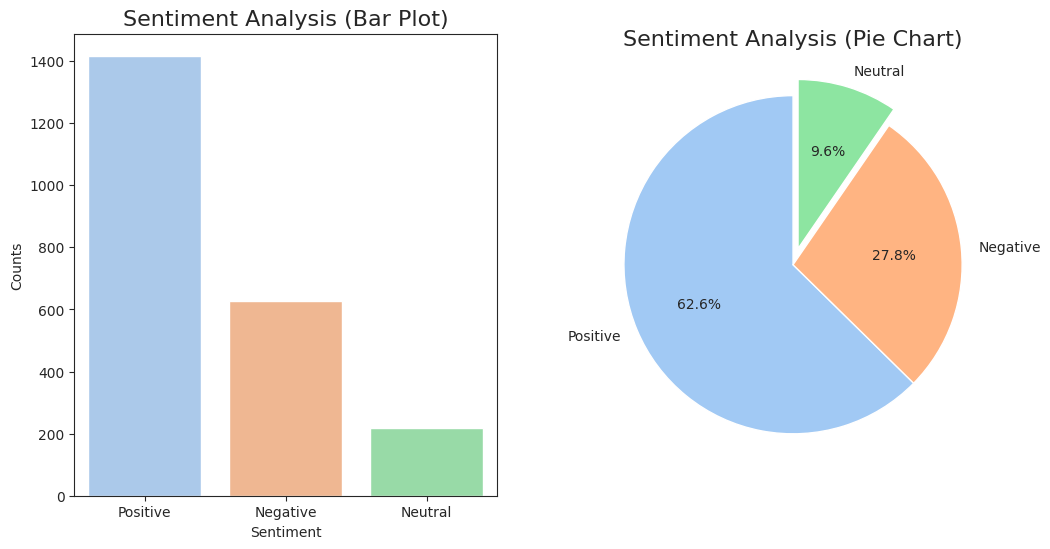

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('ticks')  # set background color to white
sns.set_palette('pastel')  # set palette color to 'pastel'

# membuat figure dan 2 axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# menggambar bar plot di axes pertama
sns.barplot(x=vader_counts.index, y=vader_counts.values, ax=ax1)
ax1.set_title('Sentiment Analysis (Bar Plot)', fontsize=16)
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Counts')

# menggambar pie chart di axes kedua
labels = vader_counts.index
sizes = vader_counts.values
explode = (0, 0, 0.1)  # memberikan efek explode pada slice pertama
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Sentiment Analysis (Pie Chart)', fontsize=16)

# menampilkan figure
plt.show()

**Words Count, Bigram, Trigram**

Using data frame that has been created, I try to visualized:

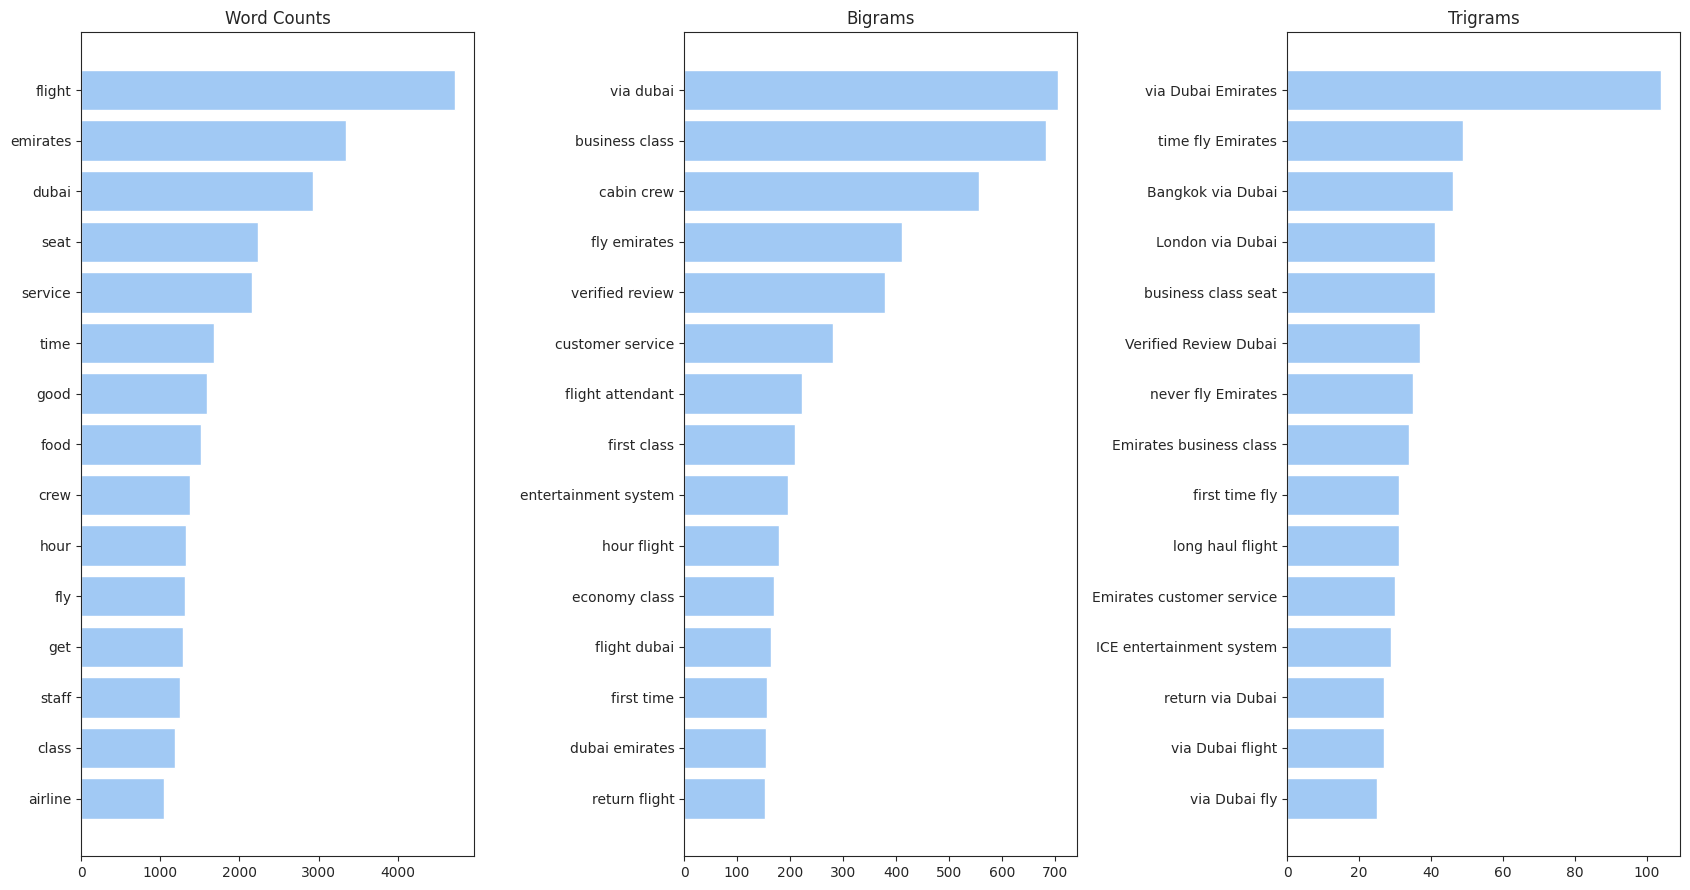

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,9))

# Data frame word counts for first plot
plt.subplot(1, 3, 1) 
plt.barh(df_word_counts['Word'][:15], df_word_counts['Frequency'][:15])
plt.gca().invert_yaxis() # split y axis to visualize from the bigger frequency
plt.title('Word Counts')

# Data frame bigram for 2nd plot
plt.subplot(1, 3, 2) 
plt.barh(bigrams_df['Bigram'][:15], bigrams_df['Frequency'][:15])
plt.gca().invert_yaxis() # split y axis to visualize from the bigger frequency
plt.title('Bigrams')

# Data frame trigram for the last plot
plt.subplot(1, 3, 3) 
plt.barh(trigrams_df['Trigram'][:15], trigrams_df['Frequency'][:15])
plt.gca().invert_yaxis() # split y axis to visualize from the bigger frequency
plt.title('Trigrams')

plt.tight_layout() # making distance between sub plot
plt.show()

For another level visualization, I try to visualized them using seaborn and more variation colors

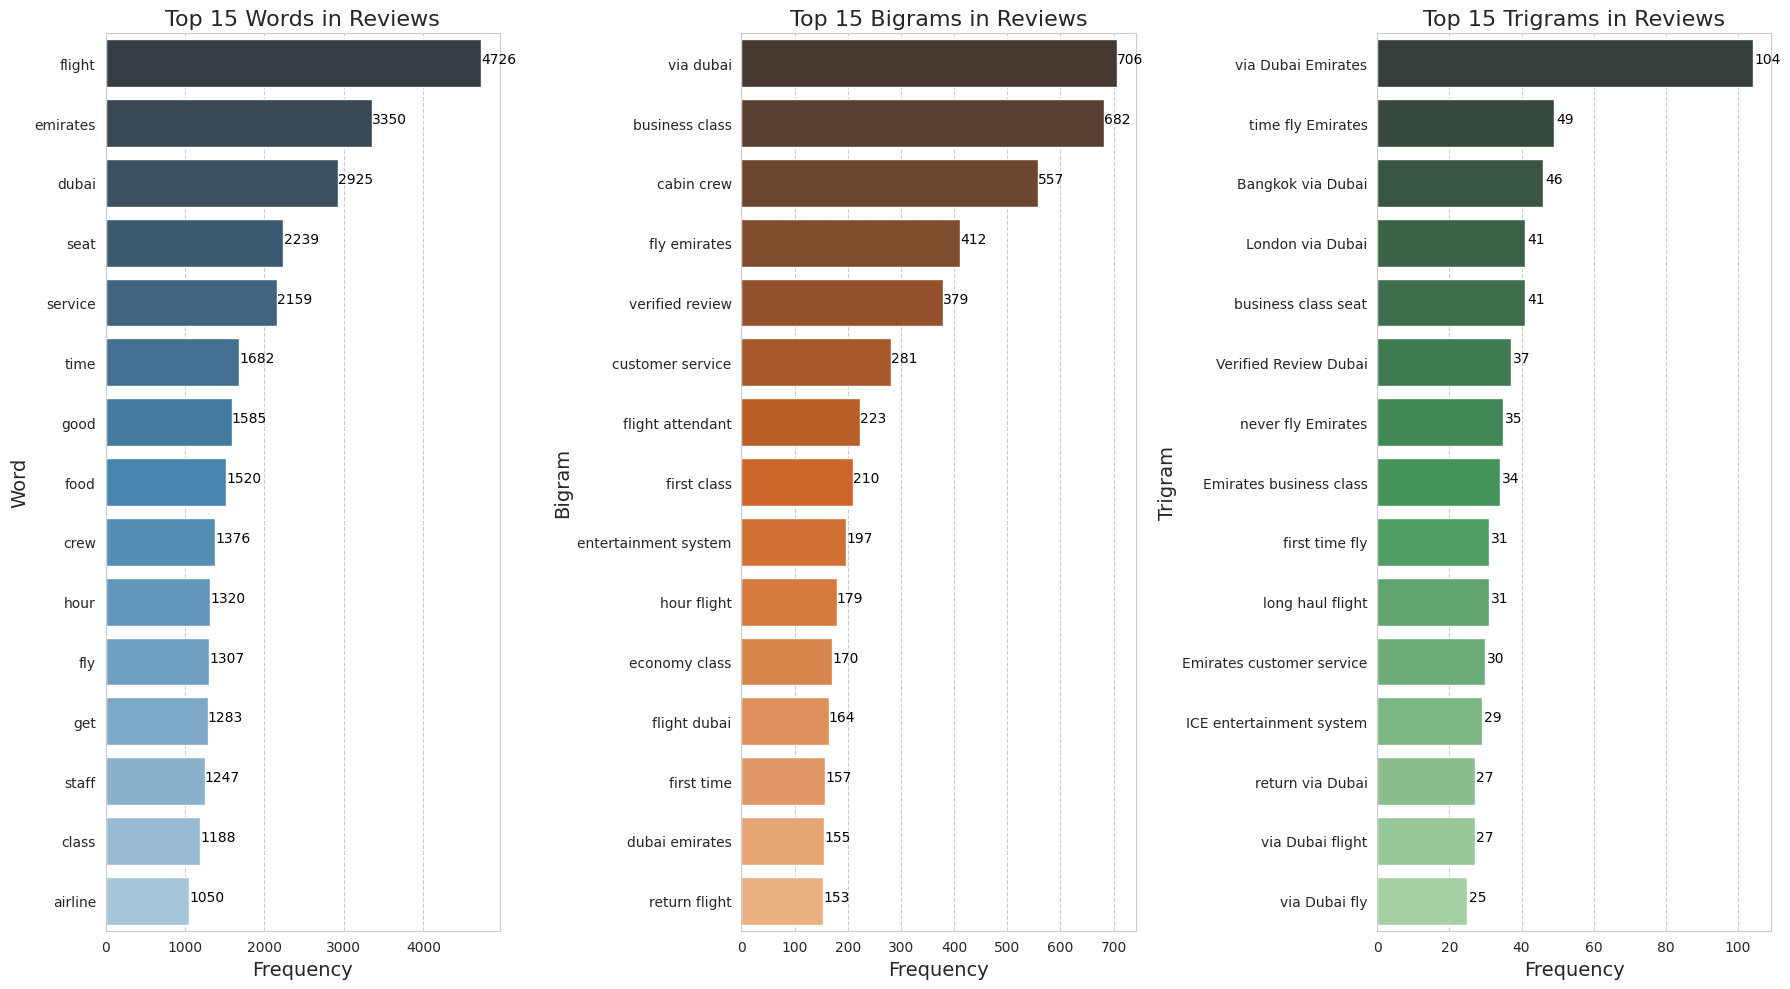

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# setting how many rows or data will be visualized
top_words = df_word_counts.nlargest(15, 'Frequency')
top_bigrams = bigrams_df.nlargest(15, 'Frequency')
top_trigrams = trigrams_df.nlargest(15, 'Frequency')

# Create figure
plt.figure(figsize=(18,10))
sns.set_style("whitegrid", {'grid.linestyle': '--', 'alpha': 0.5})


# Data frame word counts for first plot
plt.subplot(1, 3, 1)
sns.barplot(x='Frequency', y='Word', data=top_words, palette= sns.color_palette("Blues_d", n_colors=15)[::-1])
plt.ylabel('Word', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 15 Words in Reviews', fontsize=16)


# Give anotation number for every bar
for i, v in enumerate(top_words['Frequency']):
    plt.text(v + 0.5, i, str(v), color='black', fontsize=10)

# Barplot for bigram
plt.subplot(1, 3, 2) 
sns.barplot(x='Frequency', y='Bigram', data=top_bigrams, palette= sns.color_palette("Oranges_d", n_colors=15)[::-1])
plt.ylabel('Bigram', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 15 Bigrams in Reviews', fontsize=16)

# Give anotation number for every bar
for i, v in enumerate(top_bigrams['Frequency']):
    plt.text(v + 0.5, i, str(v), color='black', fontsize=10)

# Barplot for trigram
plt.subplot(1, 3, 3) 
sns.barplot(x='Frequency', y='Trigram', data=top_trigrams, palette= sns.color_palette("Greens_d", n_colors=15)[::-1])
plt.ylabel('Trigram', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 15 Trigrams in Reviews', fontsize=16)

# Give anotation number for every bar
for i, v in enumerate(top_trigrams['Frequency']):
    plt.text(v + 0.5, i, str(v), color='black', fontsize=10)

plt.tight_layout() # making distance between sub plot
plt.show()

## **Conclusion**

**1. Sentiment Analysis**

  The given data represents the results of sentiment analysis of text reviews on Emirates Airlines' services. In this analysis, the text reviews were classified into three sentiment categories, namely `positive`, `negative`, and `neutral`.

  The data shows that out of all the reviews, `1407 were categorized as positive`, `620 were categorized as negative`, and `214 were categorized as neutral`. This means that the majority of reviews about Emirates Airlines' services are positive.

  This can be seen as an indication that most users of Emirates Airlines are satisfied with the services provided, including flight services and other services available at Emirates Airlines. However, although most of the reviews are positive, there is still a small percentage of reviews that are categorized as negative, which can be a consideration for Emirates Airlines to continue improving and enhancing the quality of the services provided.

**2. Top 15 Words in Reviews**

  This data frame shows the most frequently occurring words in the analyzed text. From this data, we can see that the word `flight` appears the most, with a count of 4686, followed by `emirates` with a count of 3326, and `dubai` with a count of 2909. Other common words include `seat` (2221) and `service` (2137). Based on this analysis, we can conclude that the text primarily discusses experiences related to flying with Emirates and visiting Dubai.

**3. Top 15 Bigrams in Reviews**

  This data frame shows the most frequently occurring pairs of words in the analyzed text. From this data, we can see that the most common bigram is `via dubai` with a frequency of 704, followed by `business class` with a frequency of 674, and `cabin crew` with a frequency of 551. Other common bigrams include `fly emirates` (409) and `verified review` (379). Based on this analysis, we can conclude that the text primarily discusses experiences related to flying via Dubai with business class and interactions with the cabin crew.

**4. Top 15 Trigrams in Reviews**

  This data frame shows the most frequently occurring groups of three words in the analyzed text. From this data, we can see that the most common trigram is `via dubai emirates` with a frequency of 105, followed by `business class seat` with a frequency of 60, and `emirates business class` with a frequency of 56. Other common trigrams include `time fly emirates` (49) and `bangkok via dubai` (46). Based on this analysis, we can conclude that the text primarily discusses experiences related to flying via Dubai with business class, comfortable seating, and Emirates' services.

## **CLOSING**

In this project, we have conducted web scraping and text analysis on Emirates Airlines passenger reviews to gain deeper understanding of their experiences. By using text analysis techniques such as web scraping, text analysis, sentiment analysis, bigram, and trigram, we were able to determine the messages and sentiments conveyed in the reviews and identify patterns in the language used.

However, we recognize that this project has its limitations and shortcomings. Therefore, we apologize if there are any areas that are less satisfactory or could not be presented in full in this project.

We hope that this project can be beneficial to you and provide an overview of how text analysis can be used to understand the messages conveyed in customer reviews. Thank you for the opportunity and we hope that this project can be useful to you